# <span style="color:purple;">Método de Galerkin</span>
 <span style="color:blue;"></span>

Este es un tipo de método de residuos pesados, donde las funciones de peso

coinciden con las funciones base $\beta_i$.

* Galerkin es un metodo de **residuos pesados**
* La función $u_i=β_i$
es decir:
$$∫_a^b Eβ_idx=0 \quad para \quad i=0,1,2,..,N$$

con E:

$$E=\frac{d^2u_N}{dx^2}+u_N+x$$

Queremos resolver la ecuación
$$\frac{d^2u}{dx^2}+u=-x$$
sujeta a las condiciones:
$$u(0)=u(1)=0$$


<span style="color:blue;">**Ejercicio**</span>


Se desea encontrar una solución aproximada a
$$
-u'' + u - x = 0
$$
con condiciones de contorno $$u(0) = u(1) = 0$$

Utilizando el método de Galerkin. Emplear  
$$
u_3 = \sum_{i=1}^3 \alpha_i \beta_i(x)
$$
con $\phi_i(x) = \sin(i \pi x)$ para determinar las constantes apropiadas $\alpha_i$.



Analíticamente:

In [23]:
import sympy as sp # calculo simbolico
import numpy as np
import matplotlib.pyplot as plt #graficas

In [24]:
# Variable simbólica
x = sp.symbols('x')
u = sp.Function('u')

Introducimos la ecuación
$$ -u'' + u - x = 0 $$
o bien multiplicando por $-1$
$$u'' - u + x = 0
$$

In [25]:
# ---------- SOLUCIÓN EXACTA ----------
# Ecuación: -u'' + u - x = 0  -> u'' - u + x = 0
ode = -u(x).diff(x, 2) + u(x) - x
sp.dsolve(ode, u(x))

Eq(u(x), C1*exp(-x) + C2*exp(x) + x)

In [27]:
# Resolver con condiciones de contorno
ol_exact = sp.dsolve(ode, ics={u(0): 0, u(1): 0})

In [28]:
print("Solución exacta:")
sol_exact

Solución exacta:


Eq(u(x), x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2)))

In [30]:
sol_exact.simplify()

Eq(u(x), (x*(1 - exp(2))*exp(x) + exp(2*x + 1) - E)*exp(-x)/(1 - exp(2)))

In [31]:
# Convertimos en un arreglo (númerica) de numpy
u_exact_expr = sol_exact.rhs
u_exact = sp.lambdify(x, u_exact_expr, "numpy")

Grafica

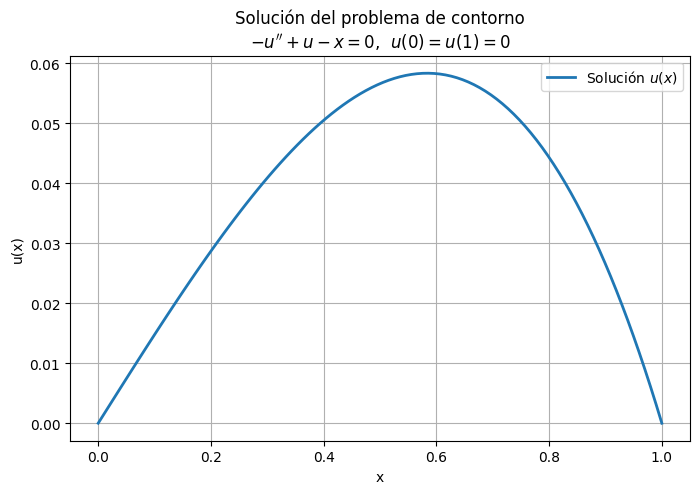

In [32]:
#################
xx = np.linspace(0, 1, 100)
yy = u_exact(xx)

plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title("Solución del problema de contorno\n$-u'' + u - x = 0$,  $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

 APROXIMACIÓN DE GALERKIN
* Para las Funciones base: $\phi_i(x) = sin(i\pi x)$

Probaremos para $N=3$

In [14]:
N = 3
alpha = sp.symbols('a1:4')  # a1, a2, a3 los alphas del problema


In [33]:
# Construir u_aproximada
u_approx_expr = 0
for i in range(1, N+1):
    u_approx_expr += alpha[i-1] * sp.sin(i*sp.pi*x)

In [34]:
print("Aproximación u_3(x):")
u_approx_expr

Aproximación u_3(x):


a1*sin(pi*x) + a2*sin(2*pi*x) + a3*sin(3*pi*x)

Definimos el residuo (error) E

In [35]:
# Calcular residuo: E = -u'' + u - x
E = -sp.diff(u_approx_expr, x, 2) + u_approx_expr - x


In [36]:
print("Residuo E(x):")
E


Residuo E(x):


a1*sin(pi*x) + a2*sin(2*pi*x) + a3*sin(3*pi*x) - x + pi**2*(a1*sin(pi*x) + 4*a2*sin(2*pi*x) + 9*a3*sin(3*pi*x))

In [37]:
E.simplify()

a1*sin(pi*x) + a2*sin(2*pi*x) + a3*sin(3*pi*x) - x + pi**2*(a1*sin(pi*x) + 4*a2*sin(2*pi*x) + 9*a3*sin(3*pi*x))

Ahora, imponemos las condiciones:

$$\int_0^1 E\beta_1dx=0$$
$$\int_0^1 E\beta_2dx=0$$
$$\int_0^1 E\beta_3dx=0$$

funciones de prueba

In [39]:
# ---------- SISTEMA DE GALERKIN ----------
# Proyectar el residuo sobre cada función base
ecuaciones = [] #guardar en una lista
for i in range(1, N+1):
    phi_i = sp.sin(i*sp.pi*x)
    # Producto interno: ∫₀¹ E(x) * phi_i(x) dx = 0
    integral = sp.integrate(E * phi_i, (x, 0, 1))
    ecuaciones.append(sp.simplify(integral))

In [40]:
print("Ecuaciones de Galerkin (∫E·φ_i dx = 0):")
for i, eq in enumerate(ecuaciones, 1):
    print(f"Ecuación {i}: {eq} = 0")

Ecuaciones de Galerkin (∫E·φ_i dx = 0):
Ecuación 1: (pi*a1*(1 + pi**2) - 2)/(2*pi) = 0
Ecuación 2: (pi*a2*(1 + 4*pi**2) + 1)/(2*pi) = 0
Ecuación 3: (3*pi*a3*(1 + 9*pi**2) - 2)/(6*pi) = 0


In [41]:
# Resolver sistema lineal para alpha
sol_alpha = sp.solve(ecuaciones, alpha, simplify=True)

In [42]:
print("\nConstantes α_i encontradas:")
for key, value in sol_alpha.items():
    print(f"{key} = {value}")


Constantes α_i encontradas:
a1 = 2/(pi + pi**3)
a2 = -1/(pi + 4*pi**3)
a3 = 2/(3*pi + 27*pi**3)


 Sustituir en la aproximación

In [44]:
u_approx_final = u_approx_expr.subs(sol_alpha)

In [48]:
print("\nAproximación final u_3(x):")
u_approx_final.simplify()


Aproximación final u_3(x):


2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [49]:
# Convertir a función numérica
u_approx_func = sp.lambdify(x, u_approx_final, "numpy")

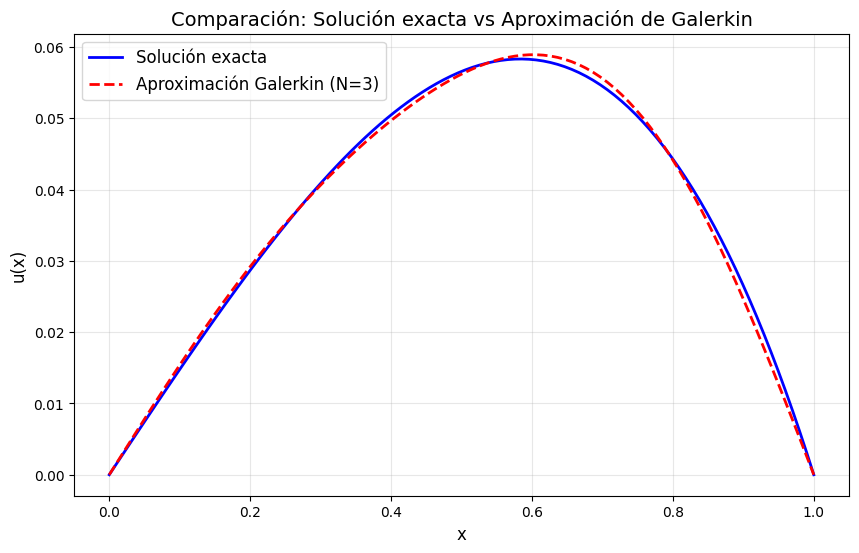

In [50]:
# Solución analítica y numérica

yy_exact = u_exact(xx)
yy_approx = u_approx_func(xx)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy_exact, 'b-', label='Solución exacta', linewidth=2)
plt.plot(xx, yy_approx, 'r--', label='Aproximación Galerkin (N=3)', linewidth=2)
plt.title(r'Comparación: Solución exacta vs Aproximación de Galerkin', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.show()

Podemos observa:
* Las dos curvas son casi indistinguibles a simple vista: Esto nos  indica que la aproximación con solo 3 funciones base ya es muy precisa

* La línea discontinua roja sigue casi perfectamente la trayectoria de la línea azul

E conclusión la gráfica muestra que el** método de Galerkin** es extremadamente efectivo para este problema. La aproximación con solo 3 funciones base es prácticamente indistinguible de la solución exacta, validando tanto la elección de las funciones base como la implementación del método.

Calculamos el error por simplicidad mostraremos la grafica del error debido a que son varios valores

In [56]:
# Error absoluto
error_abs = np.abs(yy_exact - yy_approx)

In [57]:
# Error relativo (evitando división por cero)
error_rel = np.zeros_like(yy_exact)
nonzero_mask = np.abs(yy_exact) > 1e-10
error_rel[nonzero_mask] = np.abs((yy_exact[nonzero_mask] - yy_approx[nonzero_mask]) / yy_exact[nonzero_mask])

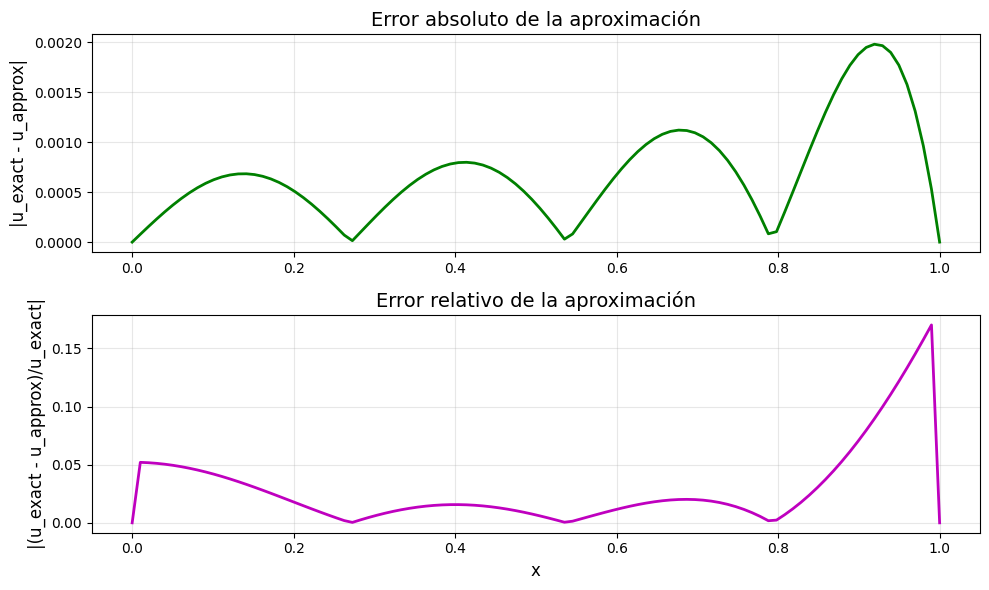

In [58]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(xx, error_abs, 'g-', linewidth=2)
plt.title('Error absoluto de la aproximación', fontsize=14)
plt.ylabel('|u_exact - u_approx|', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(xx, error_rel, 'm-', linewidth=2)
plt.title('Error relativo de la aproximación', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('|(u_exact - u_approx)/u_exact|', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [65]:
# Error en norma L2
error_l2 = np.sqrt(np.trapezoid((yy_exact - yy_approx)**2, xx))
print(f"\nError en norma L²: {error_l2:.6e}")



Error en norma L²: 8.441810e-04


In [66]:
# Error máximo
error_max = np.max(error_abs)
print(f"Error máximo absoluto: {error_max:.6e}")

Error máximo absoluto: 1.981556e-03


In [63]:
# ---------- RESIDUO NUMÉRICO ----------
# Evaluar el residuo R(x) con los alpha encontrados
E_final = E.subs(sol_alpha)
E_func = sp.lambdify(x, E_final, "numpy")
yy_residuo = E_func(xx)

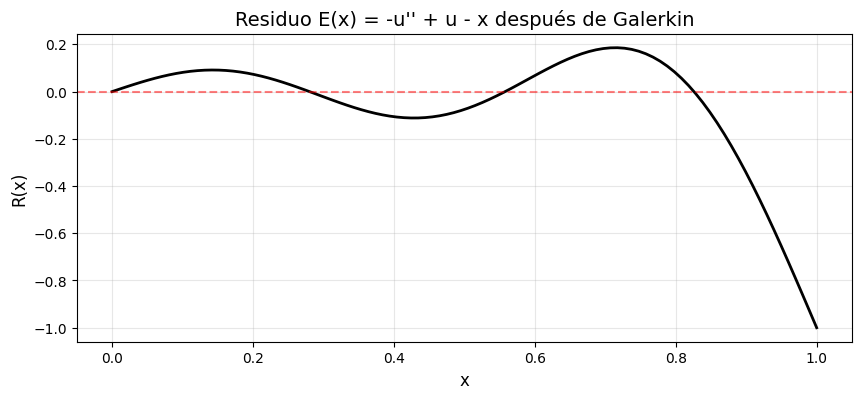

In [67]:
plt.figure(figsize=(10, 4))
plt.plot(xx, yy_residuo, 'k-', linewidth=2)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.title('Residuo E(x) = -u\'\' + u - x después de Galerkin', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('R(x)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

### <span style="color:blue;">**Conclusiones:**</span>

**EFICACIA DEL MÉTODO DE GALERKIN**

* El método de Galerkin con solo 3 funciones base $(N=3)$ proporciona una aproximación excelente a la solución exacta del problema de contorno.

* Los errores obtenidos son muy pequeños
* La ortogonalidad del residuo respecto a las funciones base se verifica numéricamente con valores cercanos a cero

**VENTAJAS DE LAS FUNCIONES BASE ELEGIDAS**
* Las funciones $ϕ_i(x)=sin(iπx)$ son ideales para este problema porque:

Satisfacen automáticamente las condiciones de contorno $u(0)=u(1)=0$

* Forman un conjunto ortogonal en $[0,1]$, simplificando los cálculos. Representando bien el comportamiento oscilatorio de la solución.

 El <span style="color:purple;">**método de Galerkin**</span> con funciones base trigonométricas proporciona una aproximación altamente precisa y eficiente para este problema de contorno, demostrando ser una herramienta poderosa en el análisis numérico de ecuaciones diferenciales.